# Initial Setup

In [2]:
##!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=a5b7e806ac77153c36e9a28e4ab876ca3d73c8c4f48d472785db6315e5b6cf44
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [3]:
##!python -m pip install findspark

## Import Package

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
import pyspark.sql.functions as F

conf = SparkConf().setAppName('dibimbing').setMaster('local[*]')
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.getOrCreate()

#Data Load and EDA

In [5]:
df = spark.read.csv('/content/BankChurners.csv', inferSchema=True, header=True)
df.show(5)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [6]:
df.columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [7]:
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

## Simple Aggregation

In [8]:
df.describe('Attrition_Flag').show(10)

+-------+-----------------+
|summary|   Attrition_Flag|
+-------+-----------------+
|  count|             7036|
|   mean|             NULL|
| stddev|             NULL|
|    min|Attrited Customer|
|    max|Existing Customer|
+-------+-----------------+



In [9]:
df.select('Attrition_Flag','Customer_Age').show(10)

+-----------------+------------+
|   Attrition_Flag|Customer_Age|
+-----------------+------------+
|Existing Customer|          45|
|Existing Customer|          49|
|Existing Customer|          51|
|Existing Customer|          40|
|Existing Customer|          40|
|Existing Customer|          44|
|Existing Customer|          51|
|Existing Customer|          32|
|Existing Customer|          37|
|Existing Customer|          48|
+-----------------+------------+
only showing top 10 rows



In [10]:
df_grouped = df.groupBy("Customer_Age").agg(F.percentile_approx("Total_Revolving_Bal", 0.5).alias("median_revolving_bal"))
df_grouped.orderBy(F.col("Customer_Age").asc()).show()

+------------+--------------------+
|Customer_Age|median_revolving_bal|
+------------+--------------------+
|          26|                1198|
|          27|                1351|
|          28|                1191|
|          29|                1223|
|          30|                1272|
|          31|                1180|
|          32|                1325|
|          33|                1344|
|          34|                1510|
|          35|                1316|
|          36|                1482|
|          37|                1338|
|          38|                1205|
|          39|                1251|
|          40|                1282|
|          41|                1175|
|          42|                1233|
|          43|                1237|
|          44|                1223|
|          45|                1247|
+------------+--------------------+
only showing top 20 rows



In [11]:
df.groupby('Customer_Age').count().orderBy('Customer_Age').show()

+------------+-----+
|Customer_Age|count|
+------------+-----+
|          26|   72|
|          27|   22|
|          28|   24|
|          29|   36|
|          30|   48|
|          31|   50|
|          32|   67|
|          33|  101|
|          34|  106|
|          35|  148|
|          36|  184|
|          37|  206|
|          38|  211|
|          39|  241|
|          40|  233|
|          41|  252|
|          42|  267|
|          43|  320|
|          44|  323|
|          45|  318|
+------------+-----+
only showing top 20 rows



## Complex Aggregation

In [12]:
windowSpec = Window.partitionBy("Gender").orderBy(F.col("Total_Trans_Amt").desc())
df.withColumn("Rank", F.dense_rank().over(windowSpec)).show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+----+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_A

In [13]:
from pyspark.sql.functions import row_number
windowSpec = Window.partitionBy("Gender").orderBy(F.col("Total_Trans_Amt").desc())

df_with_rank = df.withColumn("Rank", F.dense_rank().over(windowSpec))

df_with_rank = df_with_rank.withColumn("Row_Number", row_number().over(windowSpec))

df_with_rank.select("Customer_Age", "Gender", "Total_Trans_Amt", "Rank", "Row_Number").orderBy("Gender", "Total_Trans_Amt", ascending=[True, False]).show(20)


+------------+------+---------------+----+----------+
|Customer_Age|Gender|Total_Trans_Amt|Rank|Row_Number|
+------------+------+---------------+----+----------+
|          56|     F|           5774|   1|         1|
|          42|     F|           5668|   2|         2|
|          42|     F|           5533|   3|         3|
|          52|     F|           5532|   4|         4|
|          50|     F|           5532|   4|         5|
|          44|     F|           5495|   5|         6|
|          48|     F|           5480|   6|         7|
|          36|     F|           5471|   7|         8|
|          41|     F|           5466|   8|         9|
|          56|     F|           5429|   9|        10|
|          44|     F|           5428|  10|        11|
|          34|     F|           5409|  11|        12|
|          43|     F|           5409|  11|        13|
|          44|     F|           5408|  12|        14|
|          43|     F|           5400|  13|        15|
|          47|     F|       

## Complex Statistics


In [14]:
from pyspark.mllib.stat import Statistics

df_features = df.select("Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Credit_Limit")


rdd_table = df_features.rdd.map(lambda row: row[0:])


corr_mat=Statistics.corr(rdd_table, method="pearson")
corr_mat

array([[ 1.00000000e+00, -2.81287852e-02, -8.11935912e-02,
         1.19444088e-02, -9.03547170e-04],
       [-2.81287852e-02,  1.00000000e+00,  8.87609564e-01,
        -3.58949585e-02, -1.18483083e-01],
       [-8.11935912e-02,  8.87609564e-01,  1.00000000e+00,
        -2.06419826e-02, -7.44617257e-02],
       [ 1.19444088e-02, -3.58949585e-02, -2.06419826e-02,
         1.00000000e+00,  1.83175138e-02],
       [-9.03547170e-04, -1.18483083e-01, -7.44617257e-02,
         1.83175138e-02,  1.00000000e+00]])

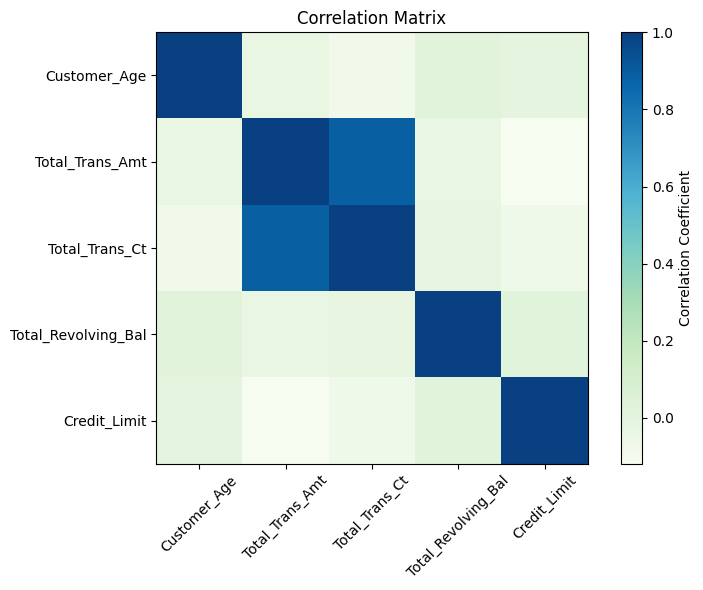

In [15]:
# Convert the correlation matrix to a numpy array for plotting
corr_mat = np.array(corr_mat)

# Visualization enhancement using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_mat, cmap='GnBu', interpolation='none')
plt.colorbar(label="Correlation Coefficient")

# Set x and y labels with the respective column names
labels = ["Customer_Age", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal","Credit_Limit"]
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

# Add title and adjust the layout
plt.title("Correlation Matrix")
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convert the selected columns to a vector
assembler = VectorAssembler(inputCols=["Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Credit_Limit"], outputCol="features")
df_vector = assembler.transform(df)

# Calculate the correlation matrix
correlation = Correlation.corr(df_vector, "features", "pearson").head()
corr_matrix = correlation[0].toArray()

print(corr_matrix)


[[ 1.00000000e+00 -2.81287852e-02 -8.11935912e-02  1.19444088e-02
  -9.03547170e-04]
 [-2.81287852e-02  1.00000000e+00  8.87609564e-01 -3.58949585e-02
  -1.18483083e-01]
 [-8.11935912e-02  8.87609564e-01  1.00000000e+00 -2.06419826e-02
  -7.44617257e-02]
 [ 1.19444088e-02 -3.58949585e-02 -2.06419826e-02  1.00000000e+00
   1.83175138e-02]
 [-9.03547170e-04 -1.18483083e-01 -7.44617257e-02  1.83175138e-02
   1.00000000e+00]]


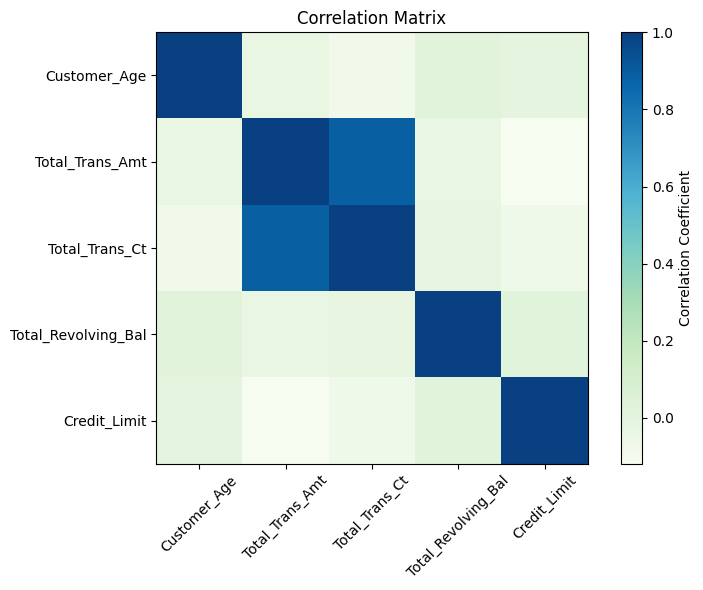

In [17]:
# Convert the correlation matrix to a numpy array for plotting
corr_matrix = np.array(corr_matrix)

# Visualization enhancement using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='GnBu', interpolation='none')
plt.colorbar(label="Correlation Coefficient")

# Set x and y labels with the respective column names
labels = ["Customer_Age", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal","Credit_Limit"]
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

# Add title and adjust the layout
plt.title("Correlation Matrix")
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
def calculate_correlation(df, col1, col2):
    return df.select(F.corr(col1, col2).alias(f"corr_{col1}_{col2}"))

correlation = calculate_correlation(df, "Total_Trans_Amt", "Credit_Limit")
correlation.show()

+---------------------------------+
|corr_Total_Trans_Amt_Credit_Limit|
+---------------------------------+
|             -0.11848308303625446|
+---------------------------------+



In [19]:
churned_customers = df.filter(F.col('Attrition_Flag') == 'Attrited Customer')
churned_customers_agg = churned_customers.groupBy("Gender").agg(F.avg("Total_Trans_Amt").alias("avg_trans"))
churned_customers_agg.show()

+------+------------------+
|Gender|         avg_trans|
+------+------------------+
|     F|2082.8122866894196|
|     M|1783.7946859903382|
+------+------------------+



In [20]:
churned_customers = df.filter(F.col('Attrition_Flag') == 'Attrited Customer')
churned_customers_agg = churned_customers.groupBy("Marital_Status").agg(F.avg("Total_Trans_Amt").alias("avg_trans"))
churned_customers_agg.show()

+--------------+------------------+
|Marital_Status|         avg_trans|
+--------------+------------------+
|       Unknown|2047.3142857142857|
|       Married|1853.3399558498895|
|      Divorced|          2037.125|
|        Single|2048.0765432098765|
+--------------+------------------+



In [21]:
churned_customers = df.filter(F.col('Attrition_Flag') == 'Attrited Customer')
churned_customers_agg = churned_customers.groupBy("Card_Category").agg(F.avg("Total_Trans_Amt").alias("avg_trans"))
churned_customers_agg.show()

+-------------+------------------+
|Card_Category|         avg_trans|
+-------------+------------------+
|     Platinum|            2021.0|
|       Silver|1814.3142857142857|
|         Blue|1964.2322916666667|
|         Gold|            1958.5|
+-------------+------------------+



## RDD and SQL

In [22]:
rdd = df.rdd.map(lambda row: (row['Customer_Age'], row['Total_Trans_Amt']))
age_trans_df = rdd.toDF(["Customer_Age", "Total_Trans_Amt"])
age_trans_df.show()

+------------+---------------+
|Customer_Age|Total_Trans_Amt|
+------------+---------------+
|          45|           1144|
|          49|           1291|
|          51|           1887|
|          40|           1171|
|          40|            816|
|          44|           1088|
|          51|           1330|
|          32|           1538|
|          37|           1350|
|          48|           1441|
|          42|           1201|
|          65|           1314|
|          56|           1539|
|          35|           1311|
|          57|           1570|
|          44|           1348|
|          48|           1671|
|          41|           1028|
|          61|           1336|
|          45|           1207|
+------------+---------------+
only showing top 20 rows



In [23]:
df.createOrReplaceTempView("bank_churners")
spark.sql("SELECT MAX(Credit_Limit) FROM bank_churners WHERE Attrition_Flag = 'Attrited Customer'").show()


+-----------------+
|max(Credit_Limit)|
+-----------------+
|          34516.0|
+-----------------+



In [24]:
df.createOrReplaceTempView("bank_churners")
spark.sql("SELECT MIN(Credit_Limit) FROM bank_churners WHERE Attrition_Flag = 'Attrited Customer'").show()


+-----------------+
|min(Credit_Limit)|
+-----------------+
|           1438.3|
+-----------------+



#Data Vizualisation


##Scatter Plot


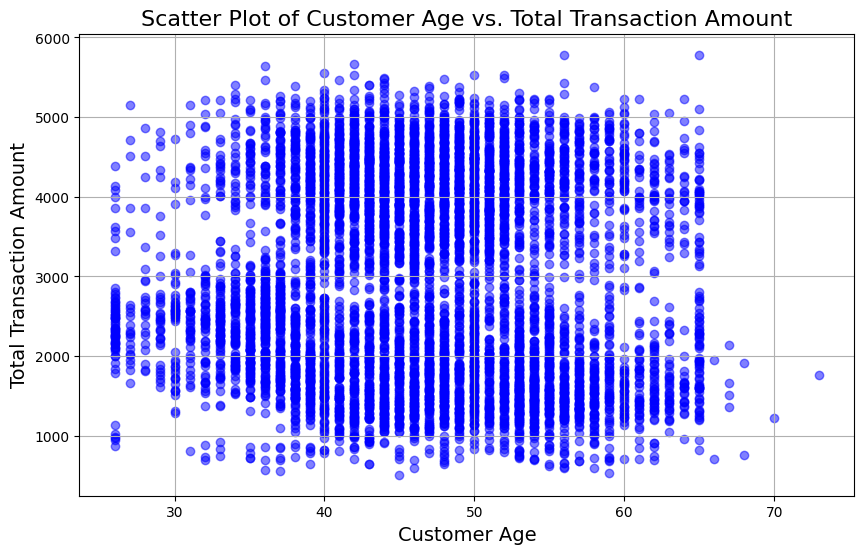

In [25]:
import matplotlib.pyplot as plt
age_trans_df_pd = age_trans_df.toPandas()
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.scatter(age_trans_df_pd["Customer_Age"], age_trans_df_pd["Total_Trans_Amt"],
            c='blue', marker='o', alpha=0.5)  # Customize marker color, shape, and transparency
plt.xlabel("Customer Age", fontsize=14)  # Increase font size
plt.ylabel("Total Transaction Amount", fontsize=14)
plt.title("Scatter Plot of Customer Age vs. Total Transaction Amount", fontsize=16)  # Add title
plt.grid(True)  # Add grid lines
plt.show()


## Distribution of Customer Age

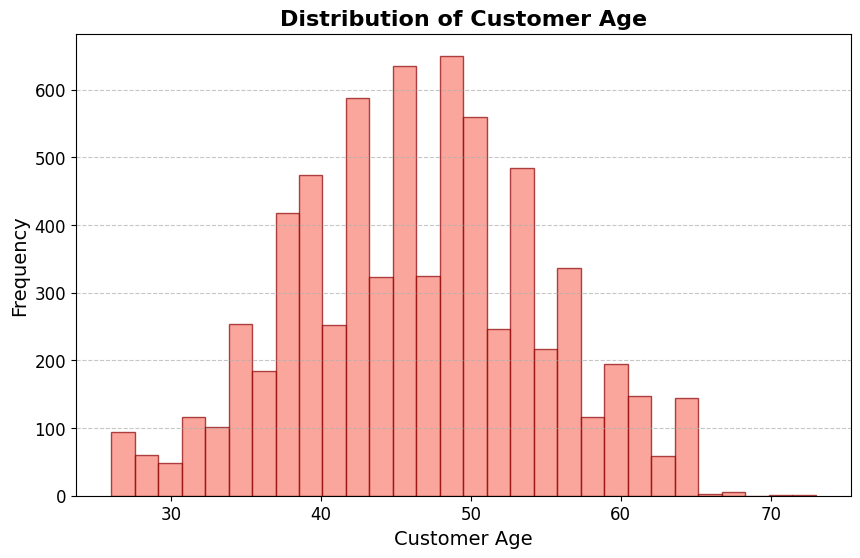

In [26]:
age_trans_df_pd = age_trans_df.toPandas()
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.hist(age_trans_df_pd['Customer_Age'], bins=30, color='salmon', edgecolor='darkred', alpha=0.7)
plt.title('Distribution of Customer Age', fontsize=16, fontweight='bold')
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## MAX Transaction by Gender

<ipython-input-27-738db11ceb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='max_trans_amt', data=df_gender_pd, palette='pastel')


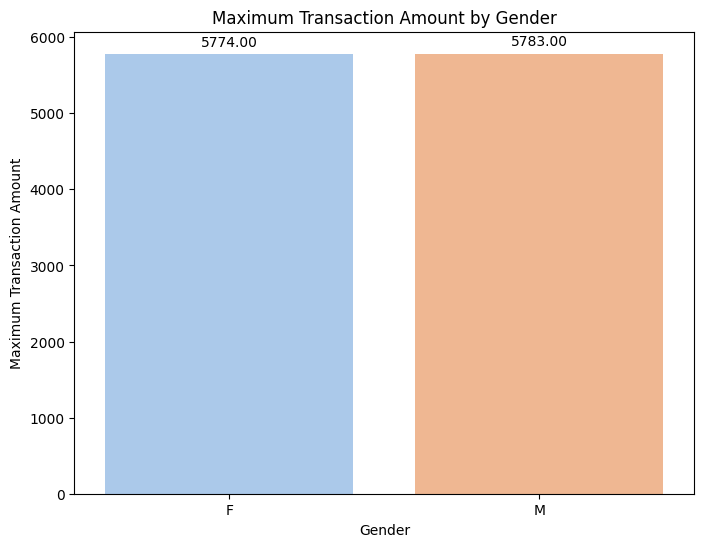

In [27]:
df_gender = df.groupBy("Gender").agg(F.max("Total_Trans_Amt").alias("max_trans_amt"))
df_gender_pd = df_gender.toPandas()

# Bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='max_trans_amt', data=df_gender_pd, palette='pastel')
plt.title('Maximum Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Maximum Transaction Amount')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()


## Boxplot

<ipython-input-34-8355acb552ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df_boxplot, palette="Set2", width=0.5)  # Change palette and width


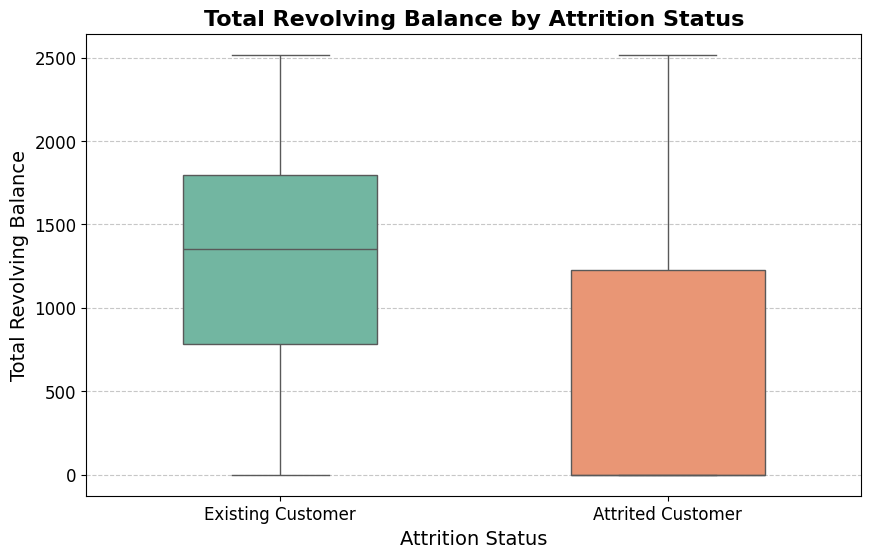

In [34]:
df_boxplot = df.select("Attrition_Flag", "Total_Revolving_Bal").toPandas()
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df_boxplot, palette="Set2", width=0.5)  # Change palette and width
plt.title('Total Revolving Balance by Attrition Status', fontsize=16, fontweight='bold')  # Customize title font
plt.xlabel('Attrition Status', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Total Revolving Balance', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


## Heatmap

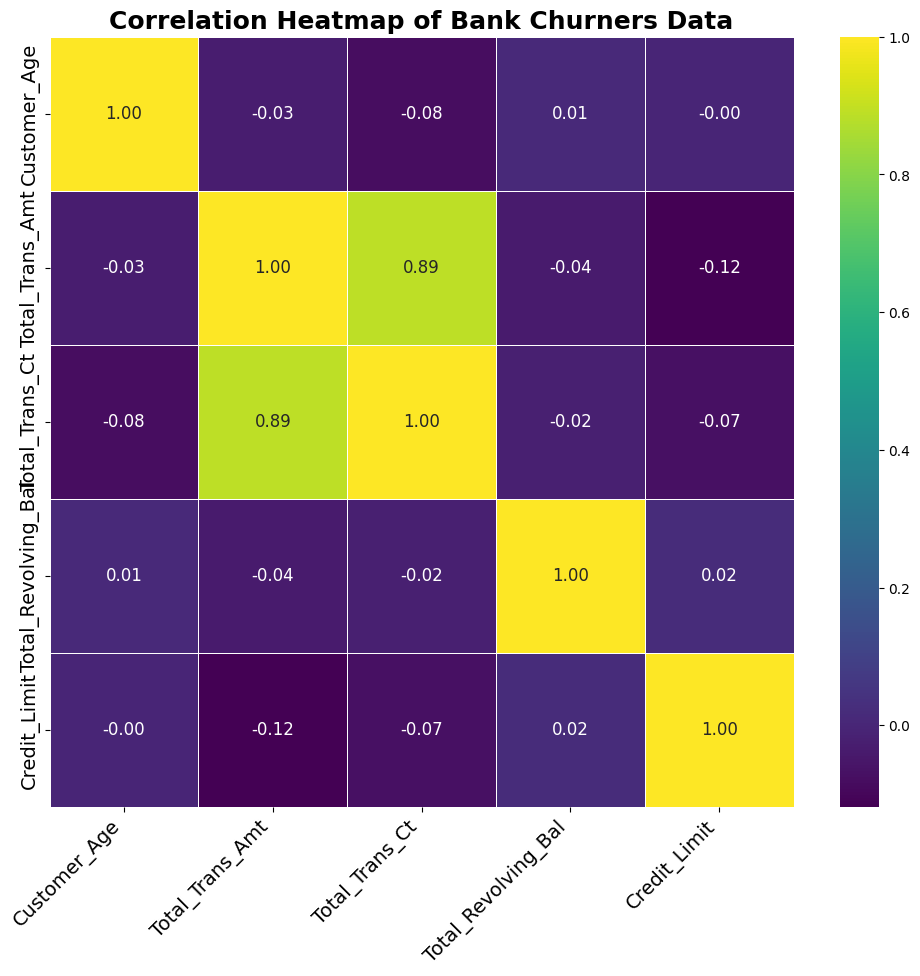

In [35]:

df_corr_pd = df_features.toPandas()
corr = df_corr_pd.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.7, annot_kws={"size": 12})  # Customize colormap, annotation size, and linewidths
plt.title('Correlation Heatmap of Bank Churners Data', fontsize=18, fontweight='bold')  # Customize title font
plt.xticks(fontsize=14, rotation=45, ha='right')  # Customize x-axis tick font size and rotation
plt.yticks(fontsize=14)  # Customize y-axis tick font size
plt.show()


## Pairplot

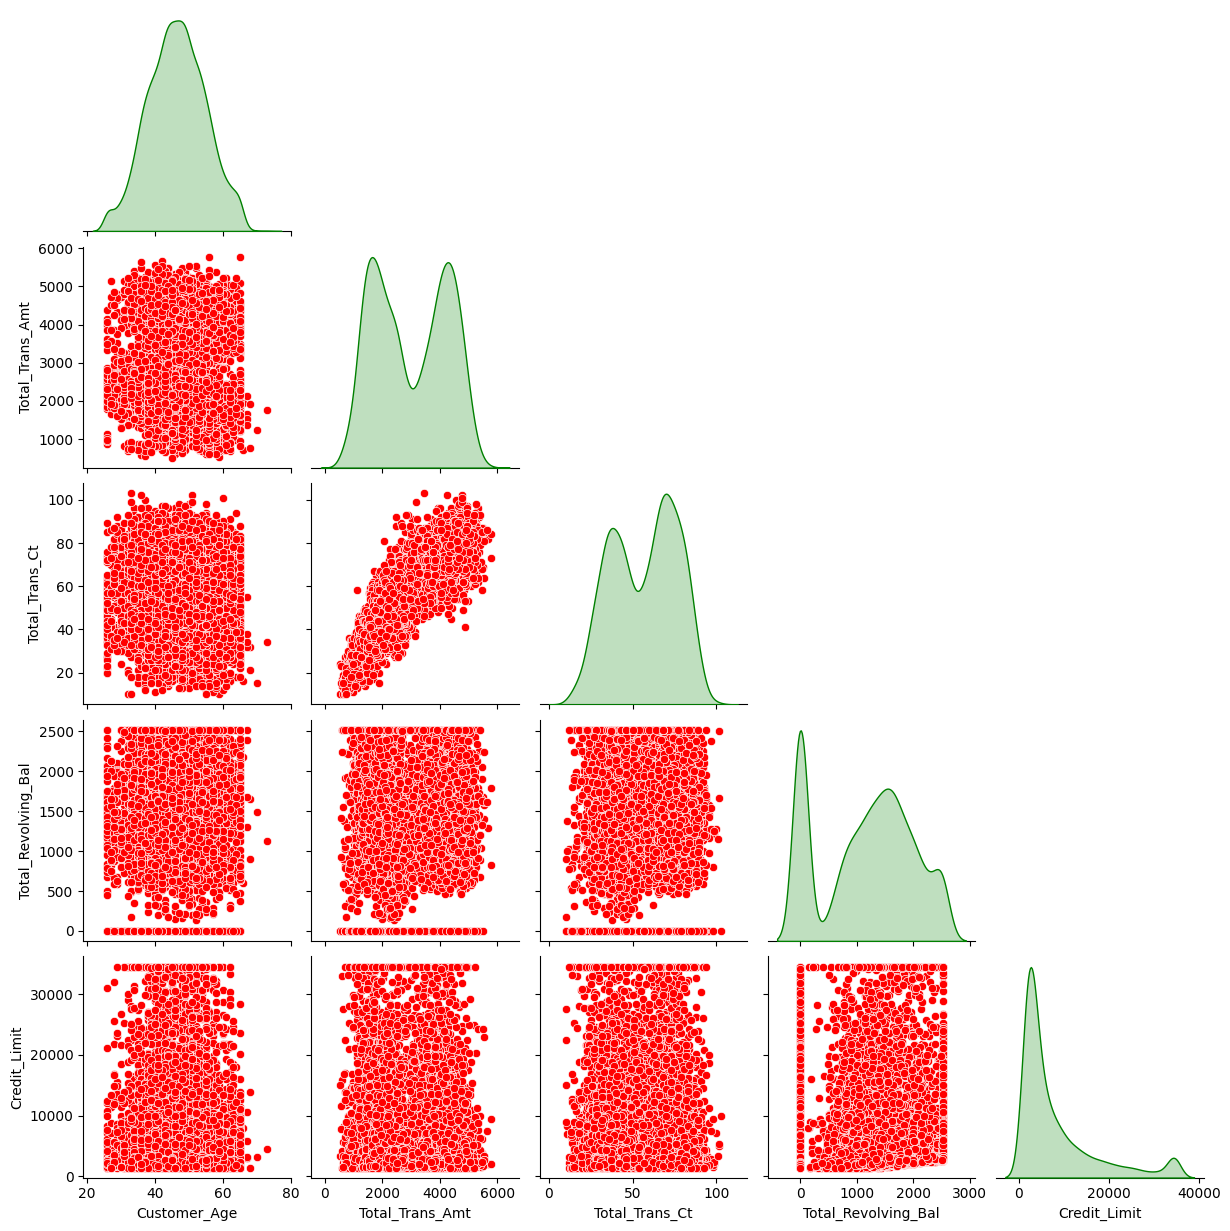

In [41]:

df_pairplot = df_features.toPandas()
sns.pairplot(df_pairplot, diag_kind='kde', corner=True, plot_kws={'color': 'red'}, diag_kws={'color': 'green'})
plt.show()


##Others


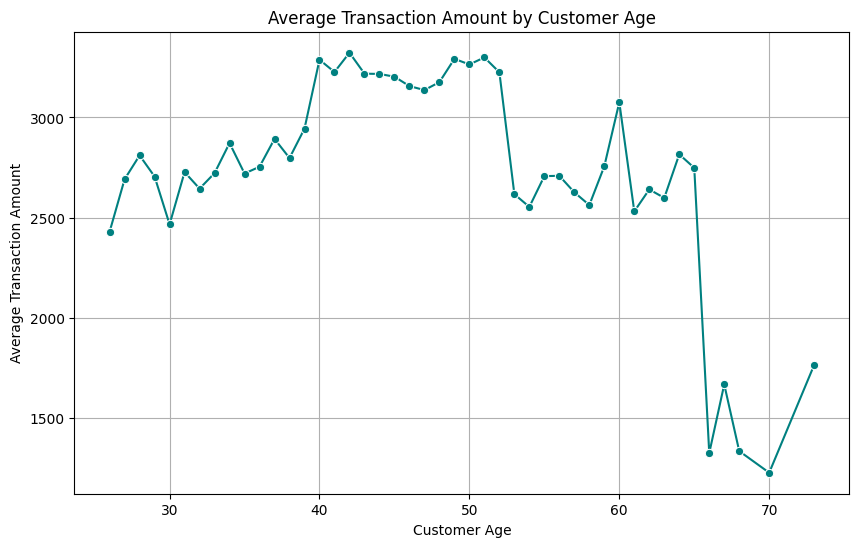

In [31]:
df_age_trans = df.groupBy("Customer_Age").agg(F.avg("Total_Trans_Amt").alias("avg_trans_amt"))
df_age_trans_pd = df_age_trans.toPandas()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Customer_Age", y="avg_trans_amt", data=df_age_trans_pd, marker="o", color="teal")
plt.title('Average Transaction Amount by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()

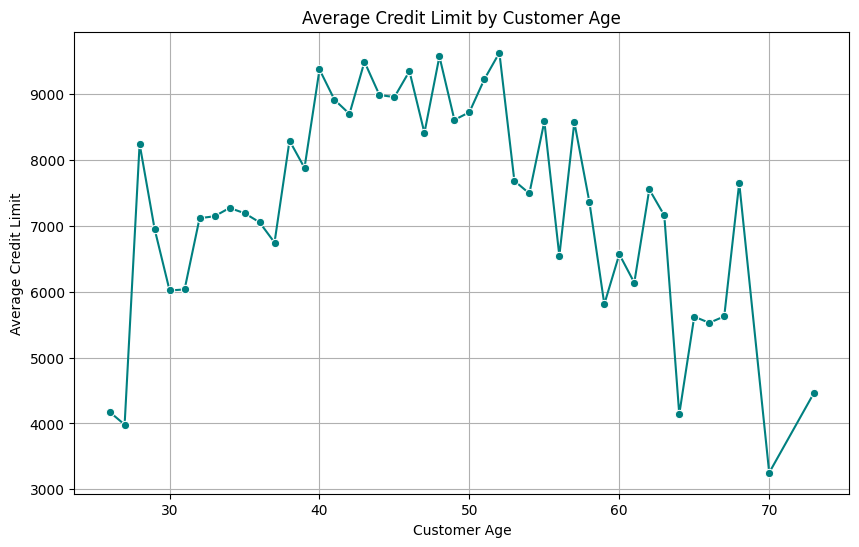

In [36]:

df_age_credit = df.groupBy("Customer_Age").agg(F.avg("Credit_Limit").alias("avg_credit_limit"))
df_age_credit_pd = df_age_credit.toPandas()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Customer_Age", y="avg_credit_limit", data=df_age_credit_pd, marker="o", color="teal")
plt.title('Average Credit Limit by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Credit Limit')
plt.grid(True)
plt.show()


<ipython-input-38-692444fdf83e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card_Category', y='total_trans_amt', data=df_card_pd, palette='Blues_d')


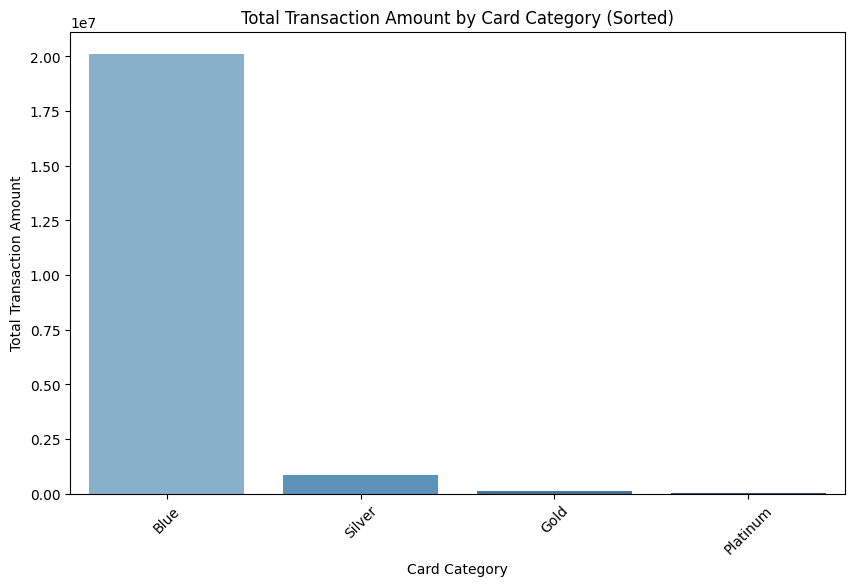

In [38]:
df_card = df.groupBy("Card_Category").agg(F.sum("Total_Trans_Amt").alias("total_trans_amt"))
df_card_pd = df_card.toPandas()

# Sort the DataFrame by total_trans_amt in descending order
df_card_pd = df_card_pd.sort_values('total_trans_amt', ascending=False)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Card_Category', y='total_trans_amt', data=df_card_pd, palette='Blues_d')
plt.title('Total Transaction Amount by Card Category (Sorted)')
plt.xlabel('Card Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-40-830cb8a3b7f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='total_trans_amt', data=df_marital_pd, palette='Blues_d')


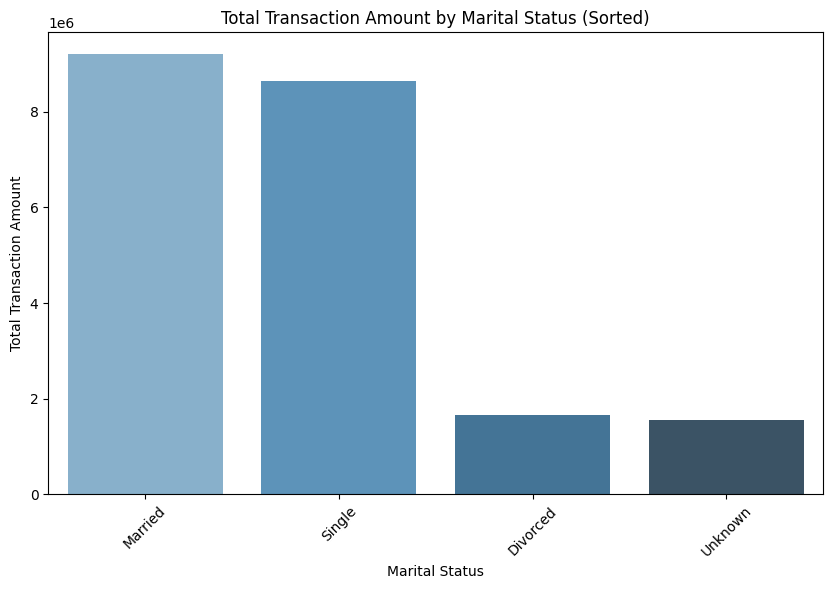

<ipython-input-40-830cb8a3b7f2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Category', y='total_trans_amt', data=df_income_pd, palette='Blues_d')


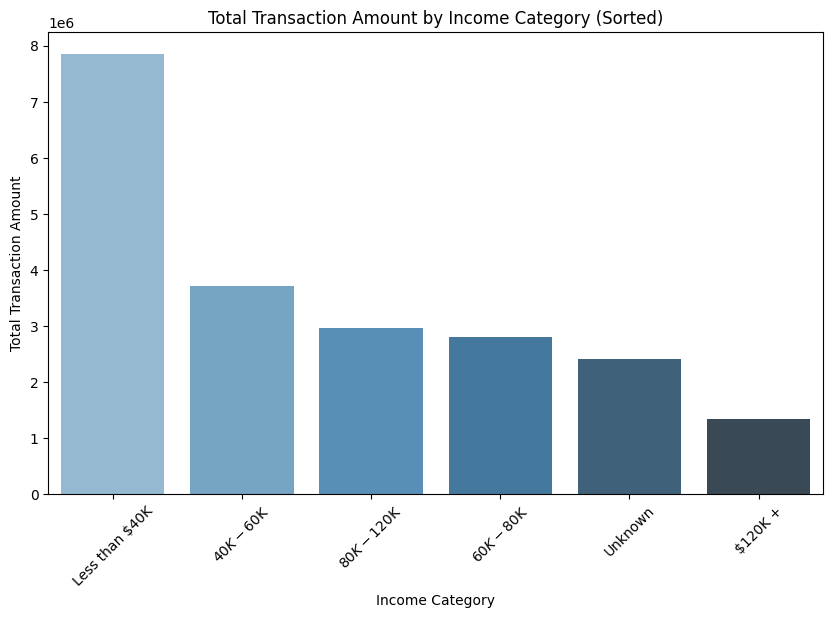

In [40]:


df_marital = df.groupBy("Marital_Status").agg(F.sum("Total_Trans_Amt").alias("total_trans_amt"))
df_marital_pd = df_marital.toPandas()
# Sort the DataFrame by total_trans_amt in descending order
df_marital_pd = df_marital_pd.sort_values('total_trans_amt', ascending=False)
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='total_trans_amt', data=df_marital_pd, palette='Blues_d')
plt.title('Total Transaction Amount by Marital Status (Sorted)')
plt.xlabel('Marital Status')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

df_income = df.groupBy("Income_Category").agg(F.sum("Total_Trans_Amt").alias("total_trans_amt"))
df_income_pd = df_income.toPandas()
# Sort the DataFrame by total_trans_amt in descending order
df_income_pd = df_income_pd.sort_values('total_trans_amt', ascending=False)
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Category', y='total_trans_amt', data=df_income_pd, palette='Blues_d')
plt.title('Total Transaction Amount by Income Category (Sorted)')
plt.xlabel('Income Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()
